# Raw Data Initial Analysis

This workbook is for analysing the raw data set.

In [33]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

## Import data
The shoppers file given to us is called bag_mus_12-22-2016.csv. 
This contains columns:
 - mac_address:
 - type:
 - date_time:
 - email: 
 - store_id:
 - fmu:
 - mall:
 - floor:
 - x:
 - y:

In [7]:
shopper_df = pd.read_csv('../data/bag_mus_12-22-2016.csv')

# Turn date time to datetime64[ns] format
shopper_df.date_time = shopper_df.date_time.astype('datetime64[ns]')

## Basic description
Different quantities of the dataset can be shown below.

In [8]:
shopper_df.head()

,mac_address,wifi_type,date_time,email,store_id,fmu,location,floor,x,y
0,24:4b:03:7d:e3:79,unknown,2016-12-22 23:58:59,unknown,A46,FMU,Mall of Mauritius,Ground Floor,156.0,125.0
1,48:ee:0c:19:33:f9,Discovered-AP,2016-12-22 23:58:59,unknown,NaN,FMU,Mall of Mauritius,Ground Floor,192.0,123.0
2,78:ba:f9:b6:ee:d0,Discovered-AP,2016-12-22 23:58:59,unknown,A62,FMU,Mall of Mauritius,Ground Floor,214.0,119.0
3,78:c3:e9:ba:60:74,unknown,2016-12-22 23:58:59,unknown,NaN,FMU,Mall of Mauritius,Ground Floor,189.0,124.0
4,a4:71:74:64:76:47,wifiuser,2016-12-22 23:58:59,1245690358803893@faceboo,A189B,FMU,Mall of Mauritius,Ground Floor,205.0,87.0


In [9]:
shopper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485949 entries, 0 to 4485948
Data columns (total 10 columns):
mac_address    object
wifi_type      object
date_time      datetime64[ns]
email          object
store_id       object
fmu            object
location       object
floor          object
x              float64
y              float64
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 342.3+ MB


In [18]:
print('{} rows'.format(len(shopper_df)))
print('{} unique rows'.format(len(shopper_df.drop_duplicates())))

4485949 rows
4452133 unique rows


There are indeed duplicate rows. A quick scan through the dataset shows that one possible explanation is that two identical pieces of data show one person who has not moved in a minute. The timestamp resolution is only to the nearest minute. For certain analyses we may want to trim these duplicates from the dataset since they do not necesarilly add any information

In [32]:
rows = len(shopper_df['mac_address'])
unique_rows = len(shopper_df['mac_address'].drop_duplicates())
average_signals = round(rows/unique_rows,3)

print('{} rows'.format(rows))
print('{} unique rows'.format(unique_rows))
print('{} average signals'.format(average_signals))

4485949 rows
232471 unique rows
19.297 average signals


There are 232471 unique mac IDs in the dataset and a total of 4485949 pieces of data. This means an average of  19.3 signals per ID.

## Time Analysis

This investigates the time of the different occurances to see if there is any unusual behaviour in the data.

### Histogram of mac address count against time

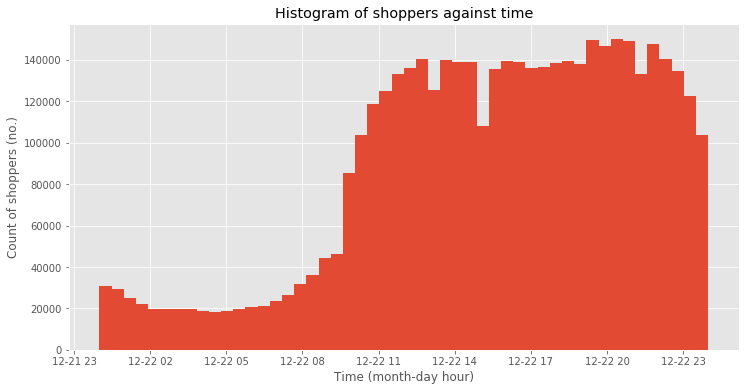

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax = shopper_df.date_time.hist(bins=50)
ax.set_title('Histogram of shoppers against time')
ax.set_xlabel('Time (month-day hour)')
ax.set_ylabel('Count of shoppers (no.)');

There are shoppers at before the store has opened. This makes us belive that there are background signals which are not actual shoppers.

## Mac Address Analysis

In [8]:
print('{} out of {} unique mac addresses'.format(len(shopper_df.mac_address.drop_duplicates()), len(shopper_df)))

232471 out of 4485949 unique mac addresses


### Histogram of shoppers against time

This shows the time when the first mac address was recorded of a device.

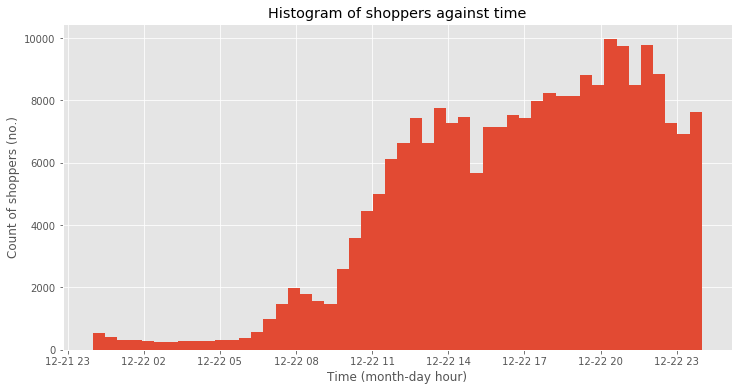

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax = shopper_df.loc[shopper_df.drop_duplicates('mac_address').index].date_time.hist(bins=50)
ax.set_title('Histogram of shoppers against time')
ax.set_xlabel('Time (month-day hour)')
ax.set_ylabel('Count of shoppers (no.)');